In [2]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os

In [3]:
def find_file_paths(patient, folders):
    """
    Find the correct image and label file paths for the given patient in the specified folders.

    Parameters:
        patient (str): The patient name or ID.
        folders (list): A list of folder names to search in.

    Returns:
        tuple: A tuple containing the image path and label path if found, else (None, None).
    """
    for folder in folders:
        image_path = f"/mnt/aix22301/onj/dataset/v0/YOLO_PA/images/{folder}/{patient}.jpg"
        label_path = f"/mnt/aix22301/onj/dataset/v0/YOLO_PA/labels/{folder}/{patient}.txt"
        if os.path.exists(image_path) and os.path.exists(label_path):
            return image_path, label_path
    return None, None

In [4]:
def viz(patient):
    """
    Visualize the image with bounding box and patient name for the given patient.

    Parameters:
        patient (str): The patient name or ID.
    """
    folders = ["train", "val", "test"]

    # Get the correct file paths
    image_path, label_path = find_file_paths(patient, folders)

    if image_path is None or label_path is None:
        print("Image or label file not found.")
        return

    # Load the image
    image = Image.open(image_path)
    image_array = np.array(image)

    # Load the bounding box coordinates from the label file
    with open(label_path, "r") as file:
        lines = file.readlines()

    # Draw the bounding boxes and add the patient name
    draw = ImageDraw.Draw(image)
    for line in lines:
        data = line.strip().split()
        class_id, x_center, y_center, width, height = map(float, data)

        # Convert YOLO format to pixel coordinates
        img_width, img_height = image.size
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height

        x_min = int(x_center - width / 2)
        y_min = int(y_center - height / 2)
        x_max = int(x_center + width / 2)
        y_max = int(y_center + height / 2)

        draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=5)

    # Set the font size and add the text
    font_size = 30
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"  # Update this path to a valid TrueType font on your system
    try:
        font = ImageFont.truetype(font_path, font_size)
    except IOError:
        font = ImageFont.load_default()
        font_size = 20  # Default font is smaller

    text_position = (10, 10)  # Position to draw the text
    draw.text(text_position, f"Patient: {patient}", fill="black", font=font)

    # Display the image with bounding boxes and text
    plt.imshow(image)
    plt.axis("off")  # Hide axis
    plt.show()

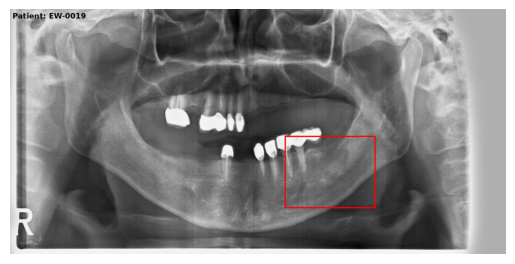

In [6]:
viz("EW-0019")

In [13]:
def viz_wo_bbox(patient):
    """
    Visualize the image with bounding box and patient name for the given patient.

    Parameters:
        patient (str): The patient name or ID.
    """
    folders = ["train", "val", "test"]

    # Get the correct file paths
    image_path, label_path = find_file_paths(patient, folders)

    if image_path is None or label_path is None:
        print("Image or label file not found.")
        return

    # # Load the image
    image = Image.open(image_path)
    image_array = np.array(image)

    # # Load the bounding box coordinates from the label file
    # with open(label_path, "r") as file:
    #     lines = file.readlines()

    # # Draw the bounding boxes and add the patient name
    # draw = ImageDraw.Draw(image)
    # for line in lines:
    #     data = line.strip().split()
    #     class_id, x_center, y_center, width, height = map(float, data)

    #     # Convert YOLO format to pixel coordinates
    #     img_width, img_height = image.size
    #     x_center *= img_width
    #     y_center *= img_height
    #     width *= img_width
    #     height *= img_height

    #     x_min = int(x_center - width / 2)
    #     y_min = int(y_center - height / 2)
    #     x_max = int(x_center + width / 2)
    #     y_max = int(y_center + height / 2)

    #     draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=5)

    # Set the font size and add the text
    font_size = 30
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"  # Update this path to a valid TrueType font on your system
    try:
        font = ImageFont.truetype(font_path, font_size)
    except IOError:
        font = ImageFont.load_default()
        font_size = 20  # Default font is smaller

    text_position = (10, 10)  # Position to draw the text
    # draw.text(text_position, f"Patient: {patient}", fill="black", font=font)

    # Display the image with bounding boxes and text
    plt.imshow(image)
    plt.axis("off")  # Hide axis
    plt.show()

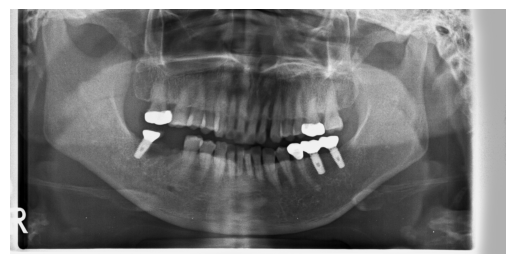

In [39]:
viz_wo_bbox("EW-0356")